In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import numpy as np
import torch 
import data_loader
from torch.utils.data import DataLoader
import trainer 
import pickle
import discriminator
import generator_v1
if torch.cuda.is_available():
      dev = "cuda:0" 
else:  
      dev = "cpu"  
device = torch.device(dev)  
DIR = 'us_import1'
device

device(type='cuda', index=0)

In [2]:
dataset_wNeg = data_loader.CatDataset_W_Neg(
    'generated_data_v1/us_import1/pos_data.npy',
    'generated_data_v1/us_import1/neg_data.npy'
)

dataset_real = data_loader.CatDataset(
    'generated_data_v1/us_import1/pos_data.npy'
)

In [3]:
DL_wNeg = DataLoader(
    dataset_wNeg,
    batch_size=128,
    shuffle=False,
    num_workers=5,
    pin_memory=False
)

DL_real = DataLoader(
    dataset_real,
    batch_size=64,
    shuffle=False,
    num_workers=5,
    pin_memory=False
)


# for i,d in enumerate(DL_wNeg):
#     print(i, d[0].shape)

In [4]:
def get_domain_dims(DIR):
    with open(os.path.join('./generated_data_v1', DIR, 'domain_dims.pkl'),'rb') as fh:
        domain_dims = pickle.load(fh)
    return domain_dims

In [5]:
domain_dims = get_domain_dims(DIR)

In [6]:
generator_obj = generator_v1.generator_v1(
    device,
    list(domain_dims.values()), z_dim = 128, lstm_hidden_dims=128, lstm_num_layers=2
)
generator_obj.to(device)

generator_v1(
  (lstm): LSTM(136, 128, num_layers=2, batch_first=True, bidirectional=True)
  (FC_List): ModuleList(
    (0): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=582, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=3005, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=1680, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=Tru

In [7]:
critic_obj = discriminator.discriminator_v1(
    emb_dim=64 , domain_dims=list(domain_dims.values())
)

critic_obj.to(device)

discriminator_v1(
  (emb_list): ModuleList(
    (0): Embedding(582, 64)
    (1): Embedding(3005, 64)
    (2): Embedding(1680, 64)
    (3): Embedding(279, 64)
    (4): Embedding(63, 64)
    (5): Embedding(131, 64)
    (6): Embedding(95, 64)
    (7): Embedding(2819, 64)
  )
  (FC): Linear(in_features=28, out_features=1, bias=False)
)

In [8]:
trainer_obj = trainer.Trainer(
    device,
    generator_obj,
    critic_obj,
    GP_weight=2,
    critic_iterations=5,
    log_interval=100,
    LR=0.00001
)

In [9]:
losses = trainer_obj.pretrain_critic(num_epochs = 25, data_loader=DL_wNeg)

  0%|          | 0/25 [00:00<?, ?it/s]

DEVICE cuda:0
Pretrain  Epoch 0| Index 1 loss -0.07060414552688599 
Pretrain  Epoch 0| Index 101 loss 0.18497365713119507 
Pretrain  Epoch 0| Index 201 loss 0.5082979202270508 
Pretrain  Epoch 0| Index 301 loss -0.24744278192520142 


  4%|▍         | 1/25 [00:21<08:32, 21.35s/it]

Pretrain  Epoch 1| Index 1 loss -0.2197260558605194 
Pretrain  Epoch 1| Index 101 loss 0.09820014238357544 
Pretrain  Epoch 1| Index 201 loss 0.42442595958709717 
Pretrain  Epoch 1| Index 301 loss -0.3447617292404175 


  8%|▊         | 2/25 [00:41<07:59, 20.85s/it]

Pretrain  Epoch 2| Index 1 loss -0.3691062331199646 
Pretrain  Epoch 2| Index 101 loss 0.010650835931301117 
Pretrain  Epoch 2| Index 201 loss 0.34037479758262634 
Pretrain  Epoch 2| Index 301 loss -0.44432902336120605 


 12%|█▏        | 3/25 [01:02<07:40, 20.93s/it]

Pretrain  Epoch 3| Index 1 loss -0.5239307284355164 
Pretrain  Epoch 3| Index 101 loss -0.07852872461080551 
Pretrain  Epoch 3| Index 201 loss 0.2548563778400421 
Pretrain  Epoch 3| Index 301 loss -0.5474547743797302 


 16%|█▌        | 4/25 [01:21<07:11, 20.56s/it]

Pretrain  Epoch 4| Index 1 loss -0.6855270862579346 
Pretrain  Epoch 4| Index 101 loss -0.17003706097602844 
Pretrain  Epoch 4| Index 201 loss 0.16657623648643494 
Pretrain  Epoch 4| Index 301 loss -0.6553605794906616 


 20%|██        | 5/25 [01:41<06:45, 20.27s/it]

Pretrain  Epoch 5| Index 1 loss -0.8550161719322205 
Pretrain  Epoch 5| Index 101 loss -0.26555994153022766 
Pretrain  Epoch 5| Index 201 loss 0.07419463992118835 
Pretrain  Epoch 5| Index 301 loss -0.7692172527313232 


 24%|██▍       | 6/25 [02:01<06:21, 20.06s/it]

Pretrain  Epoch 6| Index 1 loss -1.034018874168396 
Pretrain  Epoch 6| Index 101 loss -0.36605173349380493 
Pretrain  Epoch 6| Index 201 loss -0.023808501660823822 
Pretrain  Epoch 6| Index 301 loss -0.8905605673789978 


 28%|██▊       | 7/25 [02:20<05:59, 19.96s/it]

Pretrain  Epoch 7| Index 1 loss -1.2237725257873535 
Pretrain  Epoch 7| Index 101 loss -0.47281908988952637 
Pretrain  Epoch 7| Index 201 loss -0.12886247038841248 
Pretrain  Epoch 7| Index 301 loss -1.0205109119415283 


 32%|███▏      | 8/25 [02:40<05:38, 19.89s/it]

Pretrain  Epoch 8| Index 1 loss -1.4256110191345215 
Pretrain  Epoch 8| Index 101 loss -0.5870604515075684 
Pretrain  Epoch 8| Index 201 loss -0.24243588745594025 
Pretrain  Epoch 8| Index 301 loss -1.160074234008789 


 36%|███▌      | 9/25 [03:00<05:17, 19.87s/it]

Pretrain  Epoch 9| Index 1 loss -1.640906810760498 
Pretrain  Epoch 9| Index 101 loss -0.7100861072540283 
Pretrain  Epoch 9| Index 201 loss -0.36574819684028625 
Pretrain  Epoch 9| Index 301 loss -1.3104264736175537 


 40%|████      | 10/25 [03:20<04:57, 19.83s/it]

Pretrain  Epoch 10| Index 1 loss -1.8706703186035156 
Pretrain  Epoch 10| Index 101 loss -0.8428786993026733 
Pretrain  Epoch 10| Index 201 loss -0.5000665783882141 
Pretrain  Epoch 10| Index 301 loss -1.4722172021865845 


 44%|████▍     | 11/25 [03:40<04:38, 19.91s/it]

Pretrain  Epoch 11| Index 1 loss -2.116020679473877 
Pretrain  Epoch 11| Index 101 loss -0.9865009188652039 
Pretrain  Epoch 11| Index 201 loss -0.6463487148284912 
Pretrain  Epoch 11| Index 301 loss -1.6463172435760498 


 48%|████▊     | 12/25 [04:00<04:19, 19.97s/it]

Pretrain  Epoch 12| Index 1 loss -2.377521514892578 
Pretrain  Epoch 12| Index 101 loss -1.141786813735962 
Pretrain  Epoch 12| Index 201 loss -0.8054978251457214 
Pretrain  Epoch 12| Index 301 loss -1.833169937133789 


 52%|█████▏    | 13/25 [04:19<03:58, 19.89s/it]

Pretrain  Epoch 13| Index 1 loss -2.656125545501709 
Pretrain  Epoch 13| Index 101 loss -1.3095972537994385 
Pretrain  Epoch 13| Index 201 loss -0.9777526259422302 
Pretrain  Epoch 13| Index 301 loss -2.0334830284118652 


 56%|█████▌    | 14/25 [04:39<03:37, 19.79s/it]

Pretrain  Epoch 14| Index 1 loss -2.952352523803711 
Pretrain  Epoch 14| Index 101 loss -1.491039752960205 
Pretrain  Epoch 14| Index 201 loss -1.164298415184021 
Pretrain  Epoch 14| Index 301 loss -2.247628927230835 


 60%|██████    | 15/25 [04:58<03:16, 19.69s/it]

Pretrain  Epoch 15| Index 1 loss -3.26680588722229 
Pretrain  Epoch 15| Index 101 loss -1.686576008796692 
Pretrain  Epoch 15| Index 201 loss -1.365485429763794 
Pretrain  Epoch 15| Index 301 loss -2.476140022277832 


 64%|██████▍   | 16/25 [05:18<02:57, 19.69s/it]

Pretrain  Epoch 16| Index 1 loss -3.600217819213867 
Pretrain  Epoch 16| Index 101 loss -1.8970746994018555 
Pretrain  Epoch 16| Index 201 loss -1.5818443298339844 
Pretrain  Epoch 16| Index 301 loss -2.7193524837493896 


 68%|██████▊   | 17/25 [05:38<02:37, 19.70s/it]

Pretrain  Epoch 17| Index 1 loss -3.9541361331939697 
Pretrain  Epoch 17| Index 101 loss -2.1234140396118164 
Pretrain  Epoch 17| Index 201 loss -1.8143261671066284 
Pretrain  Epoch 17| Index 301 loss -2.9782567024230957 


 72%|███████▏  | 18/25 [05:58<02:18, 19.73s/it]

Pretrain  Epoch 18| Index 1 loss -4.328779220581055 
Pretrain  Epoch 18| Index 101 loss -2.3655035495758057 
Pretrain  Epoch 18| Index 201 loss -2.0637362003326416 
Pretrain  Epoch 18| Index 301 loss -3.253037691116333 


 76%|███████▌  | 19/25 [06:18<01:59, 19.89s/it]

Pretrain  Epoch 19| Index 1 loss -4.725708961486816 
Pretrain  Epoch 19| Index 101 loss -2.6246652603149414 
Pretrain  Epoch 19| Index 201 loss -2.330604076385498 
Pretrain  Epoch 19| Index 301 loss -3.544785737991333 


 80%|████████  | 20/25 [06:38<01:39, 19.96s/it]

Pretrain  Epoch 20| Index 1 loss -5.146007537841797 
Pretrain  Epoch 20| Index 101 loss -2.90073299407959 
Pretrain  Epoch 20| Index 201 loss -2.615211009979248 
Pretrain  Epoch 20| Index 301 loss -3.85412335395813 


 84%|████████▍ | 21/25 [06:58<01:19, 19.87s/it]

Pretrain  Epoch 21| Index 1 loss -5.590662002563477 
Pretrain  Epoch 21| Index 101 loss -3.194822311401367 
Pretrain  Epoch 21| Index 201 loss -2.918442964553833 
Pretrain  Epoch 21| Index 301 loss -4.181544303894043 


 88%|████████▊ | 22/25 [07:17<00:59, 19.78s/it]

Pretrain  Epoch 22| Index 1 loss -6.06057071685791 
Pretrain  Epoch 22| Index 101 loss -3.506661891937256 
Pretrain  Epoch 22| Index 201 loss -3.240975856781006 
Pretrain  Epoch 22| Index 301 loss -4.52829647064209 


 92%|█████████▏| 23/25 [07:37<00:39, 19.75s/it]

Pretrain  Epoch 23| Index 1 loss -6.55665397644043 
Pretrain  Epoch 23| Index 101 loss -3.837069511413574 
Pretrain  Epoch 23| Index 201 loss -3.5832366943359375 
Pretrain  Epoch 23| Index 301 loss -4.895235538482666 


 96%|█████████▌| 24/25 [07:57<00:19, 19.73s/it]

Pretrain  Epoch 24| Index 1 loss -7.079537391662598 
Pretrain  Epoch 24| Index 101 loss -4.186829566955566 
Pretrain  Epoch 24| Index 201 loss -3.945746421813965 
Pretrain  Epoch 24| Index 301 loss -5.282862186431885 


100%|██████████| 25/25 [08:16<00:00, 19.87s/it]


In [ ]:
trainer_obj.save_pretrained_D()

In [ ]:
try:
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot( np.arange(len(losses)), losses, c='r')
    plt.title('Pretrain loss')
    plt.show()
    plt.close()
except:
    pass


In [ ]:
trainer_obj.load_pretrained_D()

In [ ]:
trainer_obj.train( DL_real, DL_wNeg, num_epochs = 250)

  0%|          | 0/250 [00:00<?, ?it/s]

Iteration 100 D:0.2617 G:0.5203 
Iteration 200 D:0.3100 G:0.6061 
Iteration 300 D:0.2371 G:0.4170 
Iteration 400 D:0.0706 G:0.4584 
Iteration 500 D:0.2931 G:0.5642 
Iteration 600 D:0.3070 G:0.5243 
Iteration 700 D:0.1671 G:0.5407 


  0%|          | 1/250 [00:25<1:44:52, 25.27s/it]

Iteration 838 D:0.3516 G:0.4839 
Iteration 938 D:0.4600 G:0.5155 
Iteration 1038 D:0.2519 G:0.4826 
Iteration 1138 D:0.1102 G:0.5388 
Iteration 1238 D:0.3072 G:0.4406 
Iteration 1338 D:0.2751 G:0.4115 
Iteration 1438 D:0.2480 G:0.5287 


  1%|          | 2/250 [00:50<1:44:19, 25.24s/it]

Iteration 1576 D:0.4587 G:0.5512 
Iteration 1676 D:0.2714 G:0.4054 
Iteration 1776 D:0.2286 G:0.5542 
Iteration 1876 D:0.2337 G:0.4635 
Iteration 1976 D:0.2790 G:0.5286 
Iteration 2076 D:0.2617 G:0.5201 
Iteration 2176 D:0.1587 G:0.5120 


  1%|          | 3/250 [01:15<1:43:47, 25.21s/it]

Iteration 2314 D:0.3513 G:0.5737 
Iteration 2414 D:0.3302 G:0.5043 
Iteration 2514 D:0.2939 G:0.5462 
Iteration 2614 D:0.2404 G:0.4856 
Iteration 2714 D:0.2434 G:0.5417 
Iteration 2814 D:0.1869 G:0.4923 
Iteration 2914 D:0.2743 G:0.5564 


  2%|▏         | 4/250 [01:40<1:43:33, 25.26s/it]

Iteration 3052 D:0.2355 G:0.5089 
Iteration 3152 D:0.2701 G:0.4565 
Iteration 3252 D:0.2267 G:0.5477 
Iteration 3352 D:0.1533 G:0.4572 
Iteration 3452 D:0.3216 G:0.4613 
Iteration 3552 D:0.2227 G:0.4890 
Iteration 3652 D:0.1671 G:0.3531 


  2%|▏         | 5/250 [02:06<1:42:59, 25.22s/it]

Iteration 3790 D:0.2230 G:0.4253 
Iteration 3890 D:0.1780 G:0.5983 
Iteration 3990 D:0.2375 G:0.4404 
Iteration 4090 D:0.1059 G:0.4943 
Iteration 4190 D:0.3265 G:0.4591 
Iteration 4290 D:0.1776 G:0.4451 
Iteration 4390 D:0.1469 G:0.5150 


  2%|▏         | 6/250 [02:31<1:42:24, 25.18s/it]

Iteration 4528 D:0.3640 G:0.4999 
Iteration 4628 D:0.2379 G:0.4179 
Iteration 4728 D:0.1058 G:0.5422 
Iteration 4828 D:0.2759 G:0.5714 
Iteration 4928 D:0.3041 G:0.5211 
Iteration 5028 D:0.2134 G:0.5466 
Iteration 5128 D:0.1905 G:0.5160 


  3%|▎         | 7/250 [02:56<1:42:10, 25.23s/it]

Iteration 5266 D:0.3546 G:0.4947 
Iteration 5366 D:0.3339 G:0.5559 
Iteration 5466 D:0.1598 G:0.5937 
Iteration 5566 D:0.1029 G:0.4416 
Iteration 5666 D:0.2416 G:0.4723 
Iteration 5766 D:0.2204 G:0.5401 
Iteration 5866 D:0.2081 G:0.5081 


  3%|▎         | 8/250 [03:21<1:41:46, 25.23s/it]

Iteration 6004 D:0.3064 G:0.5931 
Iteration 6104 D:0.3684 G:0.5047 
Iteration 6204 D:0.2787 G:0.4901 
Iteration 6304 D:0.1008 G:0.5140 
Iteration 6404 D:0.1786 G:0.5339 
Iteration 6504 D:0.2128 G:0.5023 
Iteration 6604 D:0.1914 G:0.5221 


  4%|▎         | 9/250 [03:47<1:41:22, 25.24s/it]

Iteration 6742 D:0.2609 G:0.5863 
Iteration 6842 D:0.2399 G:0.4476 
Iteration 6942 D:0.0794 G:0.6011 
Iteration 7042 D:0.1148 G:0.4958 
Iteration 7142 D:0.2673 G:0.4997 
Iteration 7242 D:0.2688 G:0.5666 
Iteration 7342 D:0.0982 G:0.5593 


  4%|▍         | 10/250 [04:12<1:40:49, 25.21s/it]

Iteration 7480 D:0.3072 G:0.3830 
Iteration 7580 D:0.1484 G:0.4805 
Iteration 7680 D:0.2244 G:0.5001 
Iteration 7780 D:0.0796 G:0.4786 
Iteration 7880 D:0.2663 G:0.4580 
Iteration 7980 D:0.1949 G:0.5077 
Iteration 8080 D:0.0717 G:0.4432 


  4%|▍         | 11/250 [04:37<1:40:11, 25.15s/it]

Iteration 8218 D:0.2598 G:0.5319 
Iteration 8318 D:0.2294 G:0.5133 
Iteration 8418 D:0.1852 G:0.4144 
Iteration 8518 D:0.1636 G:0.6366 
Iteration 8618 D:0.2076 G:0.4912 
Iteration 8718 D:0.1307 G:0.4767 
Iteration 8818 D:-0.0035 G:0.5464 


  5%|▍         | 12/250 [05:02<1:39:48, 25.16s/it]

Iteration 8956 D:0.3468 G:0.5086 
Iteration 9056 D:0.2447 G:0.4877 
Iteration 9156 D:0.1313 G:0.4243 
Iteration 9256 D:0.1149 G:0.5190 
Iteration 9356 D:0.2162 G:0.4520 
Iteration 9456 D:0.1249 G:0.5478 
Iteration 9556 D:0.0827 G:0.5290 


  5%|▌         | 13/250 [05:27<1:39:31, 25.20s/it]

Iteration 9694 D:0.2325 G:0.4892 
Iteration 9794 D:0.2014 G:0.4998 
Iteration 9894 D:0.1684 G:0.5806 
Iteration 9994 D:0.1422 G:0.4818 
Iteration 10094 D:0.1381 G:0.5133 
Iteration 10194 D:0.1929 G:0.4356 
Iteration 10294 D:0.1226 G:0.4339 


  6%|▌         | 14/250 [05:52<1:38:52, 25.14s/it]

Iteration 10432 D:0.2932 G:0.5720 
Iteration 10532 D:0.1639 G:0.4724 


In [67]:
trainer_obj.train( DL_real, DL_wNeg, num_epochs = 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 100 D:-0.9481 G:0.0772 
Iteration 200 D:-0.9513 G:0.0261 
Iteration 300 D:-0.9344 G:0.0707 
Iteration 400 D:-0.9562 G:0.0777 
Iteration 500 D:-0.9669 G:0.0734 
Iteration 600 D:-0.9265 G:0.0497 
Iteration 700 D:-0.9085 G:0.1049 


  2%|▏         | 1/50 [00:25<20:51, 25.55s/it]

Iteration 838 D:-0.9486 G:0.0350 
Iteration 938 D:-0.9166 G:0.1094 
Iteration 1038 D:-0.8660 G:0.0976 
Iteration 1138 D:-0.9587 G:0.0625 
Iteration 1238 D:-0.9432 G:0.0659 
Iteration 1338 D:-0.9199 G:0.0254 
Iteration 1438 D:-0.9295 G:0.0958 


  4%|▍         | 2/50 [00:50<20:18, 25.39s/it]

Iteration 1576 D:-0.9129 G:0.1144 
Iteration 1676 D:-0.9156 G:0.0786 
Iteration 1776 D:-0.9054 G:0.0995 
Iteration 1876 D:-0.9097 G:0.0949 
Iteration 1976 D:-0.8947 G:0.0594 
Iteration 2076 D:-0.9110 G:0.0716 
Iteration 2176 D:-0.8920 G:0.0708 


  6%|▌         | 3/50 [01:15<19:48, 25.28s/it]

Iteration 2314 D:-0.9435 G:0.0788 
Iteration 2414 D:-0.9502 G:0.0555 
Iteration 2514 D:-0.8771 G:0.0198 
Iteration 2614 D:-0.8338 G:0.0530 
Iteration 2714 D:-0.8636 G:0.1065 
Iteration 2814 D:-0.9333 G:0.0802 
Iteration 2914 D:-0.9319 G:0.0884 


  8%|▊         | 4/50 [01:40<19:24, 25.31s/it]

Iteration 3052 D:-0.8978 G:0.0867 
Iteration 3152 D:-0.9394 G:0.0323 
Iteration 3252 D:-0.9112 G:0.0277 
Iteration 3352 D:-0.9344 G:0.0635 
Iteration 3452 D:-0.9540 G:0.0224 
Iteration 3552 D:-0.9149 G:0.0415 
Iteration 3652 D:-0.9319 G:0.0737 


 10%|█         | 5/50 [02:07<19:08, 25.53s/it]

Iteration 3790 D:-0.8968 G:0.0201 
Iteration 3890 D:-0.9239 G:0.0397 
Iteration 3990 D:-0.9527 G:0.0677 
Iteration 4090 D:-0.9164 G:0.0758 
Iteration 4190 D:-0.9402 G:0.0301 
Iteration 4290 D:-0.8894 G:0.0510 
Iteration 4390 D:-0.9515 G:0.0625 


 12%|█▏        | 6/50 [02:31<18:31, 25.27s/it]

Iteration 4528 D:-0.9250 G:0.0206 
Iteration 4628 D:-0.9480 G:0.0986 
Iteration 4728 D:-0.9035 G:0.0841 
Iteration 4828 D:-0.9609 G:0.0462 
Iteration 4928 D:-0.8599 G:0.0388 
Iteration 5028 D:-0.9259 G:0.0285 
Iteration 5128 D:-0.9072 G:0.0063 


 14%|█▍        | 7/50 [02:57<18:18, 25.54s/it]

Iteration 5266 D:-0.9438 G:0.0487 
Iteration 5366 D:-0.9351 G:0.0488 
Iteration 5466 D:-0.8859 G:0.0822 
Iteration 5566 D:-0.9019 G:0.0498 
Iteration 5666 D:-0.9531 G:0.0529 
Iteration 5766 D:-0.8830 G:0.0432 
Iteration 5866 D:-0.9352 G:0.0566 


 16%|█▌        | 8/50 [03:20<17:20, 24.77s/it]

Iteration 6004 D:-0.9408 G:0.0662 
Iteration 6104 D:-0.9322 G:0.0348 
Iteration 6204 D:-0.9332 G:0.0234 
Iteration 6304 D:-0.9169 G:0.0706 
Iteration 6404 D:-0.9179 G:0.0485 
Iteration 6504 D:-0.8935 G:0.0448 
Iteration 6604 D:-0.9445 G:0.0405 


 18%|█▊        | 9/50 [03:45<16:48, 24.60s/it]

Iteration 6742 D:-0.9593 G:0.0528 
Iteration 6842 D:-0.9390 G:0.1311 
Iteration 6942 D:-0.9444 G:0.0368 
Iteration 7042 D:-0.9471 G:0.0223 
Iteration 7142 D:-0.9296 G:0.0830 
Iteration 7242 D:-0.9648 G:0.0653 
Iteration 7342 D:-0.9278 G:0.0402 


 20%|██        | 10/50 [04:11<16:40, 25.02s/it]

Iteration 7480 D:-0.9486 G:0.0444 
Iteration 7580 D:-0.9513 G:0.0290 
Iteration 7680 D:-0.9594 G:0.0626 
Iteration 7780 D:-0.8782 G:0.0291 
Iteration 7880 D:-0.8948 G:0.0640 
Iteration 7980 D:-0.9837 G:0.0389 
Iteration 8080 D:-0.9068 G:0.0755 


 22%|██▏       | 11/50 [04:36<16:20, 25.15s/it]

Iteration 8218 D:-0.9700 G:0.0319 
Iteration 8318 D:-0.9445 G:0.0441 
Iteration 8418 D:-0.9605 G:0.0319 
Iteration 8518 D:-0.9108 G:0.0610 
Iteration 8618 D:-0.9340 G:0.0500 
Iteration 8718 D:-0.9320 G:0.0724 
Iteration 8818 D:-0.9390 G:0.0348 


 24%|██▍       | 12/50 [05:02<16:01, 25.31s/it]

Iteration 8956 D:-0.9442 G:0.0531 
Iteration 9056 D:-0.9252 G:0.1020 
Iteration 9156 D:-0.8936 G:0.0410 
Iteration 9256 D:-0.9378 G:0.0789 
Iteration 9356 D:-0.9304 G:0.0382 
Iteration 9456 D:-0.9601 G:0.0539 
Iteration 9556 D:-0.9425 G:0.0245 


 26%|██▌       | 13/50 [05:26<15:29, 25.12s/it]

Iteration 9694 D:-0.9628 G:0.0624 
Iteration 9794 D:-0.9434 G:0.0340 
Iteration 9894 D:-0.9047 G:0.0613 
Iteration 9994 D:-0.9354 G:0.0962 
Iteration 10094 D:-0.9300 G:0.0559 
Iteration 10194 D:-0.9363 G:0.0304 
Iteration 10294 D:-0.9092 G:0.0327 


 28%|██▊       | 14/50 [05:51<15:02, 25.07s/it]

Iteration 10432 D:-0.9551 G:0.0332 
Iteration 10532 D:-0.9549 G:0.0695 
Iteration 10632 D:-0.9481 G:0.0659 
Iteration 10732 D:-0.8884 G:0.0780 
Iteration 10832 D:-0.9166 G:0.0715 
Iteration 10932 D:-0.9679 G:0.0600 
Iteration 11032 D:-0.9513 G:0.0916 


 30%|███       | 15/50 [06:16<14:38, 25.11s/it]

Iteration 11170 D:-0.9572 G:0.0446 
Iteration 11270 D:-0.9218 G:0.0444 
Iteration 11370 D:-0.9490 G:0.0145 
Iteration 11470 D:-0.8976 G:0.0456 
Iteration 11570 D:-0.9104 G:0.0448 
Iteration 11670 D:-0.9405 G:0.0190 
Iteration 11770 D:-0.9445 G:0.0325 


 32%|███▏      | 16/50 [06:39<13:51, 24.45s/it]

Iteration 11908 D:-0.9653 G:0.0390 
Iteration 12008 D:-0.9544 G:0.0401 
Iteration 12108 D:-0.9560 G:0.0061 
Iteration 12208 D:-0.9367 G:0.0306 
Iteration 12308 D:-0.9363 G:0.0209 
Iteration 12408 D:-0.9334 G:0.0613 
Iteration 12508 D:-0.9506 G:0.0756 


 34%|███▍      | 17/50 [07:05<13:33, 24.66s/it]

Iteration 12646 D:-0.9183 G:0.0566 
Iteration 12746 D:-0.9508 G:0.0630 
Iteration 12846 D:-0.9484 G:0.0676 
Iteration 12946 D:-0.9164 G:0.0624 
Iteration 13046 D:-0.8699 G:0.0436 
Iteration 13146 D:-0.9117 G:0.0540 
Iteration 13246 D:-0.9540 G:0.0254 


 36%|███▌      | 18/50 [07:30<13:18, 24.97s/it]

Iteration 13384 D:-0.9551 G:0.0958 
Iteration 13484 D:-0.9214 G:0.0534 
Iteration 13584 D:-0.9293 G:0.0400 
Iteration 13684 D:-0.9459 G:0.0549 
Iteration 13784 D:-0.9128 G:0.0341 
Iteration 13884 D:-0.9551 G:0.0567 
Iteration 13984 D:-0.9220 G:0.0377 


 38%|███▊      | 19/50 [07:58<13:17, 25.71s/it]

Iteration 14122 D:-0.9717 G:0.0917 
Iteration 14222 D:-0.9310 G:0.0747 
Iteration 14322 D:-0.9108 G:0.0753 
Iteration 14422 D:-0.9514 G:0.0166 
Iteration 14522 D:-0.9149 G:0.0522 
Iteration 14622 D:-0.8959 G:0.0596 
Iteration 14722 D:-0.9613 G:0.0140 


 40%|████      | 20/50 [08:21<12:27, 24.92s/it]

Iteration 14860 D:-0.9396 G:0.0188 
Iteration 14960 D:-0.9394 G:0.0138 
Iteration 15060 D:-0.9080 G:0.0410 
Iteration 15160 D:-0.9376 G:0.0454 
Iteration 15260 D:-0.9609 G:0.0732 
Iteration 15360 D:-0.9384 G:0.0536 
Iteration 15460 D:-0.9510 G:0.0971 


 42%|████▏     | 21/50 [08:47<12:16, 25.41s/it]

Iteration 15598 D:-0.9662 G:0.0352 
Iteration 15698 D:-0.8817 G:0.0360 
Iteration 15798 D:-0.9309 G:0.0418 
Iteration 15898 D:-0.9375 G:0.0184 
Iteration 15998 D:-0.9460 G:0.1080 
Iteration 16098 D:-0.9348 G:0.0705 
Iteration 16198 D:-0.9249 G:0.0518 


 44%|████▍     | 22/50 [09:16<12:15, 26.28s/it]

Iteration 16336 D:-0.9724 G:0.0245 
Iteration 16436 D:-0.9112 G:0.0244 
Iteration 16536 D:-0.9858 G:0.0261 
Iteration 16636 D:-0.9345 G:0.0294 
Iteration 16736 D:-0.8921 G:0.0541 
Iteration 16836 D:-0.9499 G:0.0443 
Iteration 16936 D:-0.9615 G:0.0415 


 46%|████▌     | 23/50 [09:47<12:34, 27.95s/it]

Iteration 17074 D:-0.9693 G:0.0335 
Iteration 17174 D:-0.9636 G:0.0271 
Iteration 17274 D:-0.9236 G:0.0593 
Iteration 17374 D:-0.9602 G:0.0218 
Iteration 17474 D:-0.9659 G:0.0220 
Iteration 17574 D:-0.9555 G:0.0277 
Iteration 17674 D:-0.9446 G:0.0529 


  0%|          | 0/2 [00:00<?, ?it/s]

DEVICE cuda:0
Pretrain  Epoch 0| Index 1 loss 11.325309753417969 
Pretrain  Epoch 0| Index 101 loss 10.844563484191895 
Pretrain  Epoch 0| Index 201 loss 10.998490333557129 
Pretrain  Epoch 0| Index 301 loss 10.778209686279297 



 50%|█████     | 1/2 [00:30<00:30, 30.02s/it]

Pretrain  Epoch 1| Index 1 loss 11.262852668762207 
Pretrain  Epoch 1| Index 101 loss 10.775591850280762 
Pretrain  Epoch 1| Index 201 loss 10.930530548095703 
Pretrain  Epoch 1| Index 301 loss 10.711016654968262 



100%|██████████| 2/2 [00:54<00:00, 27.40s/it]


Iteration 17812 D:-0.9549 G:0.0475 
Iteration 17912 D:-0.9676 G:0.0634 
Iteration 18012 D:-0.9200 G:0.0306 
Iteration 18112 D:-0.8808 G:0.0332 
Iteration 18212 D:-0.9433 G:0.0504 
Iteration 18312 D:-0.9483 G:0.0268 
Iteration 18412 D:-0.9755 G:0.0389 


 50%|█████     | 25/50 [11:41<18:40, 44.83s/it]

Iteration 18550 D:-0.9688 G:0.0760 
Iteration 18650 D:-0.8978 G:0.0411 
Iteration 18750 D:-0.9716 G:0.0483 
Iteration 18850 D:-0.9437 G:0.0598 
Iteration 18950 D:-0.9167 G:0.0485 
Iteration 19050 D:-0.9173 G:0.0560 
Iteration 19150 D:-0.9580 G:0.0845 


 52%|█████▏    | 26/50 [12:06<15:32, 38.86s/it]

Iteration 19288 D:-0.9491 G:0.0752 
Iteration 19388 D:-0.9091 G:0.0798 
Iteration 19488 D:-0.9542 G:0.0298 
Iteration 19588 D:-0.9799 G:0.0190 
Iteration 19688 D:-0.9504 G:0.0329 
Iteration 19788 D:-0.9816 G:0.0619 
Iteration 19888 D:-0.9374 G:0.0327 


 54%|█████▍    | 27/50 [12:32<13:26, 35.05s/it]

Iteration 20026 D:-0.9846 G:0.0471 
Iteration 20126 D:-0.9177 G:0.0474 
Iteration 20226 D:-0.9343 G:0.0820 
Iteration 20326 D:-0.9369 G:0.0278 
Iteration 20426 D:-0.9713 G:0.0279 
Iteration 20526 D:-0.9248 G:0.1163 
Iteration 20626 D:-0.9425 G:0.0327 


 56%|█████▌    | 28/50 [12:56<11:36, 31.64s/it]

Iteration 20764 D:-0.9559 G:0.0355 
Iteration 20864 D:-0.9559 G:0.0410 
Iteration 20964 D:-0.9288 G:0.0253 
Iteration 21064 D:-0.9629 G:0.0203 
Iteration 21164 D:-0.9281 G:0.0670 
Iteration 21264 D:-0.9254 G:0.0512 
Iteration 21364 D:-0.9416 G:0.0566 


 58%|█████▊    | 29/50 [13:20<10:20, 29.55s/it]

Iteration 21502 D:-0.9233 G:0.0539 
Iteration 21602 D:-0.9339 G:0.0448 
Iteration 21702 D:-0.9183 G:0.0040 
Iteration 21802 D:-0.9636 G:0.0465 
Iteration 21902 D:-0.9473 G:0.0297 
Iteration 22002 D:-0.9702 G:0.0116 
Iteration 22102 D:-0.9153 G:0.0471 


 60%|██████    | 30/50 [13:44<09:18, 27.90s/it]

Iteration 22240 D:-0.9099 G:0.0323 
Iteration 22340 D:-0.9825 G:0.0420 
Iteration 22440 D:-0.9498 G:0.0249 
Iteration 22540 D:-0.8762 G:0.0392 
Iteration 22640 D:-0.9319 G:0.0242 
Iteration 22740 D:-0.9205 G:0.0658 
Iteration 22840 D:-0.9663 G:0.0801 


 62%|██████▏   | 31/50 [14:10<08:38, 27.29s/it]

Iteration 22978 D:-0.9558 G:0.0351 
Iteration 23078 D:-0.9551 G:0.0263 
Iteration 23178 D:-0.9381 G:0.0673 
Iteration 23278 D:-0.9788 G:0.0301 
Iteration 23378 D:-0.9470 G:0.0168 
Iteration 23478 D:-0.9532 G:0.0545 
Iteration 23578 D:-0.9265 G:0.0410 


 64%|██████▍   | 32/50 [14:40<08:23, 27.95s/it]

Iteration 23716 D:-0.9807 G:0.0289 
Iteration 23816 D:-0.9715 G:0.0213 
Iteration 23916 D:-0.9609 G:0.0129 
Iteration 24016 D:-0.9194 G:0.0377 
Iteration 24116 D:-0.9822 G:0.0292 
Iteration 24216 D:-0.9609 G:0.0210 
Iteration 24316 D:-0.9607 G:0.0514 


 66%|██████▌   | 33/50 [15:05<07:40, 27.07s/it]

Iteration 24454 D:-0.9567 G:0.0590 
Iteration 24554 D:-0.9576 G:0.0589 
Iteration 24654 D:-0.9302 G:0.0462 
Iteration 24754 D:-0.9328 G:0.0524 
Iteration 24854 D:-0.9457 G:0.0720 
Iteration 24954 D:-0.9555 G:0.0466 
Iteration 25054 D:-0.8914 G:0.0491 


 68%|██████▊   | 34/50 [15:29<07:00, 26.26s/it]

Iteration 25192 D:-0.9219 G:0.0484 
Iteration 25292 D:-0.9351 G:0.0121 
Iteration 25392 D:-0.9504 G:0.0257 
Iteration 25492 D:-0.9362 G:0.0258 
Iteration 25592 D:-0.9467 G:0.0413 
Iteration 25692 D:-0.9185 G:0.0758 
Iteration 25792 D:-0.9746 G:0.0330 


 70%|███████   | 35/50 [15:54<06:27, 25.84s/it]

Iteration 25930 D:-0.9235 G:0.0545 
Iteration 26030 D:-0.9555 G:0.0627 
Iteration 26130 D:-0.9397 G:0.0584 
Iteration 26230 D:-0.9513 G:0.0791 
Iteration 26330 D:-0.9759 G:0.0124 
Iteration 26430 D:-0.9779 G:0.0332 
Iteration 26530 D:-0.9350 G:0.0440 


 72%|███████▏  | 36/50 [16:20<06:00, 25.77s/it]

Iteration 26668 D:-0.9583 G:0.0366 
Iteration 26768 D:-0.9575 G:0.0337 
Iteration 26868 D:-0.9585 G:0.0340 
Iteration 26968 D:-0.9579 G:0.0796 
Iteration 27068 D:-0.9725 G:0.0395 
Iteration 27168 D:-0.9462 G:0.0469 
Iteration 27268 D:-0.9344 G:0.0206 


 74%|███████▍  | 37/50 [16:45<05:31, 25.51s/it]

Iteration 27406 D:-0.9391 G:0.0373 
Iteration 27506 D:-0.9849 G:0.0515 
Iteration 27606 D:-0.9462 G:0.0235 
Iteration 27706 D:-0.9623 G:0.0376 
Iteration 27806 D:-0.9675 G:0.0751 
Iteration 27906 D:-0.9445 G:0.0314 
Iteration 28006 D:-0.9623 G:0.0716 


 76%|███████▌  | 38/50 [17:13<05:16, 26.38s/it]

Iteration 28144 D:-0.9515 G:0.0522 
Iteration 28244 D:-0.9720 G:0.0110 
Iteration 28344 D:-0.9874 G:0.0481 
Iteration 28444 D:-0.9710 G:0.0321 
Iteration 28544 D:-0.9457 G:0.0256 
Iteration 28644 D:-0.9473 G:0.0304 
Iteration 28744 D:-0.9590 G:0.0239 


 78%|███████▊  | 39/50 [17:36<04:38, 25.29s/it]

Iteration 28882 D:-0.9548 G:0.0258 
Iteration 28982 D:-0.9589 G:0.0713 
Iteration 29082 D:-0.9711 G:0.0404 
Iteration 29182 D:-0.9511 G:0.0041 
Iteration 29282 D:-0.9442 G:0.0194 
Iteration 29382 D:-0.9290 G:0.0758 
Iteration 29482 D:-0.9316 G:0.0205 


 80%|████████  | 40/50 [18:00<04:10, 25.09s/it]

Iteration 29620 D:-0.9371 G:0.0265 
Iteration 29720 D:-0.9475 G:0.0190 
Iteration 29820 D:-0.9427 G:0.0144 
Iteration 29920 D:-0.9676 G:0.0442 
Iteration 30020 D:-0.9181 G:0.0195 
Iteration 30120 D:-0.9335 G:0.0392 
Iteration 30220 D:-0.9668 G:0.0314 


 82%|████████▏ | 41/50 [18:25<03:45, 25.01s/it]

Iteration 30358 D:-0.9759 G:0.0690 
Iteration 30458 D:-0.9696 G:0.0298 
Iteration 30558 D:-0.9519 G:0.0281 
Iteration 30658 D:-0.9326 G:0.0182 
Iteration 30758 D:-0.9520 G:0.0426 
Iteration 30858 D:-0.9666 G:0.0211 
Iteration 30958 D:-0.9323 G:0.0337 


 84%|████████▍ | 42/50 [18:53<03:27, 25.90s/it]

Iteration 31096 D:-0.9253 G:0.0306 
Iteration 31196 D:-0.9489 G:0.0649 
Iteration 31296 D:-0.9651 G:0.0206 
Iteration 31396 D:-0.9652 G:0.0430 
Iteration 31496 D:-0.9488 G:0.0799 
Iteration 31596 D:-0.9548 G:0.0103 
Iteration 31696 D:-0.9497 G:0.0046 


 86%|████████▌ | 43/50 [19:14<02:50, 24.41s/it]

Iteration 31834 D:-0.9751 G:0.0543 
Iteration 31934 D:-0.9309 G:0.0496 
Iteration 32034 D:-0.9808 G:0.0539 
Iteration 32134 D:-0.9883 G:0.0342 
Iteration 32234 D:-0.9525 G:0.0377 
Iteration 32334 D:-0.9824 G:0.0513 
Iteration 32434 D:-0.9837 G:0.0877 


 88%|████████▊ | 44/50 [19:42<02:33, 25.52s/it]

Iteration 32572 D:-0.9585 G:0.0386 
Iteration 32672 D:-0.9631 G:0.0176 
Iteration 32772 D:-0.9550 G:0.0504 
Iteration 32872 D:-0.9765 G:0.0216 
Iteration 32972 D:-0.9898 G:0.0360 
Iteration 33072 D:-0.9691 G:0.0432 
Iteration 33172 D:-0.9838 G:0.0095 


 90%|█████████ | 45/50 [20:08<02:07, 25.55s/it]

Iteration 33310 D:-0.9618 G:0.0674 
Iteration 33410 D:-0.9603 G:0.0275 
Iteration 33510 D:-0.9430 G:0.0523 
Iteration 33610 D:-0.9463 G:0.0262 
Iteration 33710 D:-0.9194 G:0.0430 
Iteration 33810 D:-0.9305 G:0.0173 
Iteration 33910 D:-0.9306 G:0.0319 


 92%|█████████▏| 46/50 [20:35<01:43, 25.95s/it]

Iteration 34048 D:-0.9318 G:0.0304 
Iteration 34148 D:-0.9539 G:0.0208 
Iteration 34248 D:-0.9499 G:0.0620 
Iteration 34348 D:-0.9676 G:0.0086 
Iteration 34448 D:-0.9799 G:0.0612 
Iteration 34548 D:-0.9679 G:0.0411 
Iteration 34648 D:-0.9471 G:0.0288 


 94%|█████████▍| 47/50 [20:56<01:13, 24.52s/it]

Iteration 34786 D:-0.9728 G:0.0400 
Iteration 34886 D:-0.9593 G:0.0470 
Iteration 34986 D:-0.9413 G:0.0178 
Iteration 35086 D:-0.9604 G:0.0498 
Iteration 35186 D:-0.9522 G:0.0062 
Iteration 35286 D:-0.9711 G:0.0557 
Iteration 35386 D:-0.9407 G:0.0290 


 96%|█████████▌| 48/50 [21:22<00:50, 25.06s/it]

Iteration 35524 D:-0.9624 G:0.0560 
Iteration 35624 D:-0.9802 G:0.0621 
Iteration 35724 D:-0.9361 G:0.0089 
Iteration 35824 D:-0.9718 G:0.0212 
Iteration 35924 D:-0.9814 G:0.0530 
Iteration 36024 D:-0.9408 G:0.0178 
Iteration 36124 D:-0.9613 G:0.0216 


  0%|          | 0/2 [00:00<?, ?it/s]

DEVICE cuda:0
Pretrain  Epoch 0| Index 1 loss 11.732269287109375 
Pretrain  Epoch 0| Index 101 loss 11.328451156616211 
Pretrain  Epoch 0| Index 201 loss 11.475496292114258 
Pretrain  Epoch 0| Index 301 loss 11.257061958312988 



 50%|█████     | 1/2 [00:20<00:20, 20.98s/it]

Pretrain  Epoch 1| Index 1 loss 11.674539566040039 
Pretrain  Epoch 1| Index 101 loss 11.26131534576416 
Pretrain  Epoch 1| Index 201 loss 11.411458969116211 
Pretrain  Epoch 1| Index 301 loss 11.19214153289795 



100%|██████████| 2/2 [00:40<00:00, 20.15s/it]


Iteration 36262 D:-0.9629 G:0.0373 
Iteration 36362 D:-0.9464 G:0.0654 
Iteration 36462 D:-0.9607 G:0.0346 
Iteration 36562 D:-0.9451 G:0.0364 
Iteration 36662 D:-0.9615 G:0.0621 
Iteration 36762 D:-0.9390 G:0.0488 
Iteration 36862 D:-0.9278 G:0.0871 


100%|██████████| 50/50 [22:47<00:00, 27.36s/it]


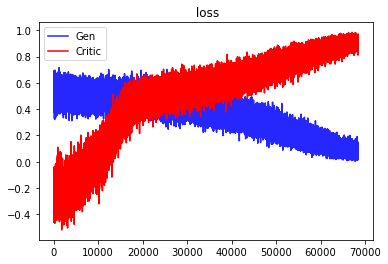

In [66]:
D_losses = trainer_obj.dict_losses['D']
G_losses = trainer_obj.dict_losses['G']
import matplotlib.pyplot as plt
plt.figure()
_D = D_losses[-len(G_losses)*5::5]
_D = [ -_ for _ in _D]
plt.plot( np.arange(len(G_losses)), G_losses, c='b', alpha=0.85,label ='Gen')
plt.plot( np.arange(len(_D )),  _D , c='r',label ='Critic')
plt.legend()
plt.title(' loss')
plt.show()
plt.close()

In [54]:
generator_obj.eval()
X = trainer_obj.sample_generator(5000)
generator_obj.train()

generator_v1(
  (lstm): LSTM(136, 128, num_layers=2, batch_first=True, bidirectional=True)
  (FC_List): ModuleList(
    (0): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=582, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=3005, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=384, out_features=1680, bias=True)
      (2): Dropout(p=0.1, inplace=False)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): BatchNorm1d(384, eps=1e-05, momentum=0.1, affine=Tru

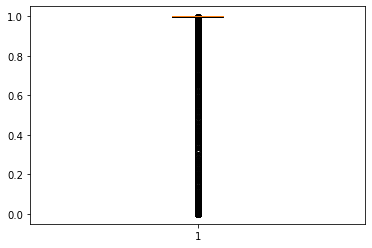

In [55]:
critic_obj.eval()
scores = critic_obj(X).cpu().data.numpy()
critic_obj.train()
plt.boxplot(scores)
plt.show()

In [56]:
np.percentile(scores,20)

0.9921089768409729

In [65]:
[len(set(X.cpu().data.numpy()[:,i])) for i in range(8)]

[582, 2411, 1595, 279, 63, 131, 95, 2321]

In [58]:

[582, 3005, 1680, 279, 63, 131, 95, 2819]

torch.Size([5000, 8])